In [9]:
import pandas as pd
df=pd.read_csv("Uber Request Data.csv")
df.head() #df.head(n=5) n=5 default
df.tail()
df.shape #rows and columns
df.columns
df





,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [7]:
#data conversion
#dictionary
temp=pd.DataFrame({"A":["1","2","3"],"B":[11,12,13],"C":["2012-06-11","2015-07-14","2017-11-04"]})
temp["A"]=pd.to_numeric(temp["A"])
temp["C"]=pd.to_datetime(temp["C"])
temp.dtypes

#date and time filtering
pd.to_datetime(["2012-06-11","2015-07-14","2017-11-04","abc"],errors="coerce")

DatetimeIndex(['2012-06-11', '2015-07-14', '2017-11-04', 'NaT'], dtype='datetime64[ns]', freq=None)

In [24]:
#data summerisation
df.describe(include="all")  
df["Pickup point"].value_counts() #count of each in a coln

City       3507
Airport    3238
Name: Pickup point, dtype: int64

In [2]:
#data maniplulation
import pandas as pd
df=pd.read_csv("Uber Request Data.csv")
# 1) Selection of rows and colns
 # ILOC:
df.iloc[0:5,0:4]  # df.iloc[rs:rl,cs:cl]
df.iloc[0:5,[2,4]]  #specific colns
df.iloc[:,2:4] # all rows but certain colns
gd=df.iloc[:,2:4] # doesent affect original df

# LOC:
df.loc[:,["Request id","Pickup point"]]

#Without LOC:
df[["Request id","Pickup point"]]

#dataframe vs series:
ads=df.loc[:,["Request id"]]  #dataframe
type(ads)

ads=df.loc[:,"Request id"] #series
type(ads)


df.loc[0:4,["Request id","Pickup point"]]


#Filtering
df[df["Request id"]>5000] # all the colns


df2=df.loc[df["Request id"]>5000,["Request id"]]
df2

my_ride=df.loc[df["Request id"]==5000,["Request id"]]  #equal to condition
my_ride

my_ride=df.loc[df["Request id"].isin([5000,6000]),:] #using isin operator
my_ride

my_ride=df.loc[(df["Request id"]>5000) &( df["Pickup point"].isin(["Airport"])),:] #two  filter conditions
my_ride=df.loc[(df["Request id"]>5000) &( df["Pickup point"].isin(["Airport"])),:] #two  filter conditions
my_ride.reset_index()#original df doesnt change

my_ride.reset_index(inplace=True,drop=True) #changes original and drops the og index
my_ride

#Sorting
df.sort_values(by=["Request id"],ascending=False)
               
               
#Conditionally adding colns
import numpy as np
df["Request grp"]=np.where(df["Request id"]>2000,"Greater","Lesser")
df

#nested,3 conditions error
#df["Request grp"]=np.where(df["Request id"]>2000,"Greater",np.where([df["Request id"]>1000 & df["Request id"]<2000],"Lesser","Not Lesser"))





,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request grp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,Lesser
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,Lesser
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,Lesser
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,Greater
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,Greater
...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN,Greater
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN,Greater
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN,Greater
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN,Greater


In [ ]:
#Grouping:
df.groupby("Start")["Miles"].agg("mean") #SAC-SPLIT,APPLY,COMBINE

#multiple split colns:
df.groupby(["Start","Stop"]).agg(["mean","sum"])

#use of dictionary ,one coln has multiple functions
res=df.groupby("Start").agg[{"Date":["min","max"],"Miles":["mean"]}]

#conversion of the grouped columns into a proper datafame
res.reset_index(Inplace=True)
res.columns=["S","d","e"]

In [22]:
#Apply Function
df1=pd.read_csv("sales.csv", sep=",", encoding='Latin-1') 
df1.select_dtypes(include=['int64','float64']).apply("mean",axis =0) #veritically

df1.select_dtypes(include=['int64','float64']).apply("mean",axis=1)# horozontal for all the rows


#case study 

import numpy as np
def bonus(sales_values):
    eligible=np.where(sales_values<10000,"eligible","not-eligible")
    return eligible
#to perform function on one columns,by creating a new coln
df1["Jan bonus"]=bonus[df["Jan"]]
#to perform function on multiple columns
new_df=df1.select_dtypes(include=["int64","float64"]).apply(bonus)
#the concatanate the two dataframes
df1=pd.concat([df1,new_df],axis=1)

0       1689.633333
1       1679.138889
2       1807.120000
3       1792.773333
4       1959.918889
           ...     
2818    1644.822222
2819    1838.056667
2820    2001.507778
2821    1630.377778
2822    1742.328889
Length: 2823, dtype: float64

In [40]:
#Missing values
import pandas as pd
years= [90,91,92,93,94,95] 
f1 ={90:8,91:9,92:7,93:8,95:12}
firm1=pd.Series(f1,index=years)
#print(firm1)
f2={91:3,95:4}
firm2=pd.Series(f2,index=years)
firm2.dropna()
df3=pd.DataFrame(columns=['Firm1','Firm2'],index=years)
df3['Firm1']=firm1
df3['Firm2']=firm2
df3.dropna() #drops row wise
df3.dropna(axis=0) #to make changes visible in dataframe
#threshold -> basically if row has more than 'n' Nan values then it is dropped 
df3.dropna(thresh=2,axis=0)

#Missing values Replacement
df3.fillna(0,inplace=True)
df3

df3.fillna(df3.mean()) #with mean,sum etc


,Firm1,Firm2
90,8.0,0.0
91,9.0,3.0
92,7.0,0.0
93,8.0,0.0
94,0.0,0.0
95,12.0,4.0


In [51]:
import pandas as pd
df=pd.read_csv("Automobile_data.csv")
#1) check the head
df.head(n=6)
#2) how many rows and colns
df.shape
#3) avg price of all the cars in the data set
df["price"].replace(inplace=True,to_replace='?',value=0)
df["price"]=pd.to_numeric(df["price"])
df["price"].mean()
#4)cheapest and costliest car
print("max:",df["price"].max(),"min:",df["price"].min())
#5) how many cars with horsepower greater than 100
df["horsepower"].replace(inplace=True,to_replace='?',value=0)
df["horsepower"]=pd.to_numeric(df["horsepower"])
df.loc[df["horsepower"]>100,:]
#6)3 most commanly found cars

#7) some purchased a car for 7099 what is the make
df.loc[df["price"]==7099,:]
df1=df.loc[df["price"]==7099,:]
df1["make"]
#8) priced greater than 40000
df.loc[df["price"]>40000,:]
#9)cars which are both sedan and less than 5000
df.loc[(df["body-style"]=="sedan") & (df["price"]<5000),:]



max: 45400 min: 0


90    nissan
Name: make, dtype: object

In [12]:
#NUMPY
import numpy as np
dist=[20,80,79,56]
spd=[2,4,6,8]
d=np.array(dist)
s=np.array(spd)         # array should be of same size
time=d/s
print(time)


[10.         20.         13.16666667  7.        ]


In [62]:
#Functions :
#ARANGE
a=np.arange(3,31,3) #gives ranges as a numpy arrray
print(a)

#linspace
b=np.linspace(0,100,5)  #gives equdistance numbers within range
print(b)

#dimensions
#reshape:
a=a.reshape(5,2) #2d array
print(a)


a=np.arange(3,37,3)  #3d array
a=a.reshape(2,3,2)
print(a)

a=np.arange(3,73,3)
a=a.reshape(2,3,2,2)  #4d array
print(a)


# conditions

a=np.array(np.arange(100))
print(a)
even=[a%2 ==0]
print(even)


#zero 
a=np.zeros((3,5))
print(a)

#one
a=np.ones((3,5))
print(a)

#eye
a=np.eye(3,3) #identity matrix
a



[ 3  6  9 12 15 18 21 24 27 30]
[  0.  25.  50.  75. 100.]
[[ 3  6]
 [ 9 12]
 [15 18]
 [21 24]
 [27 30]]
[[[ 3  6]
  [ 9 12]
  [15 18]]

 [[21 24]
  [27 30]
  [33 36]]]
[[[[ 3  6]
   [ 9 12]]

  [[15 18]
   [21 24]]

  [[27 30]
   [33 36]]]


 [[[39 42]
   [45 48]]

  [[51 54]
   [57 60]]

  [[63 66]
   [69 72]]]]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[array([ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [2]:
#Data visualisation:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df=pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


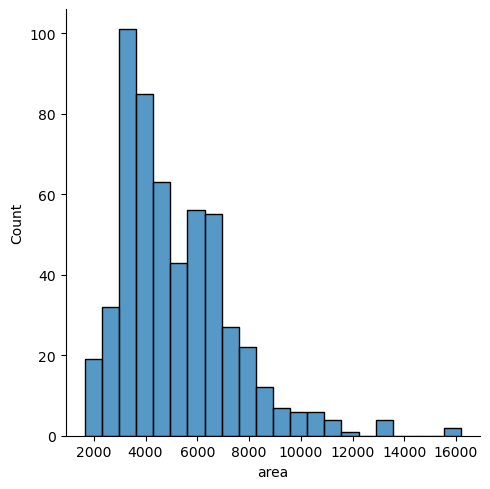

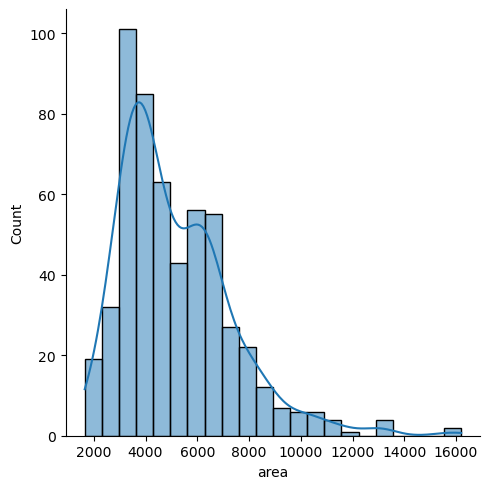

In [4]:
#UNIVARIATE
sns.displot(df["area"],kde=False)

sns.displot(df["area"],kde=True)

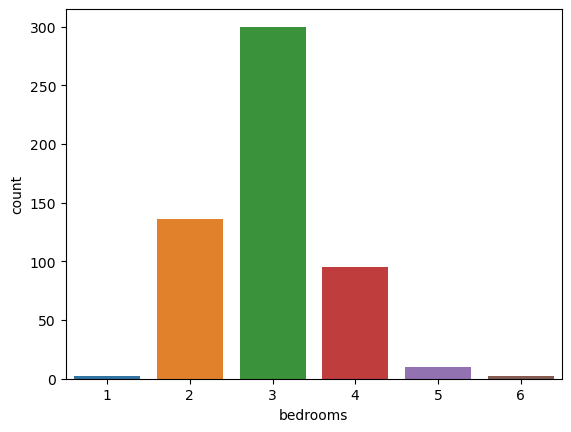

In [10]:
#bar chart
plot=sns.countplot(x="bedrooms",data=df)

<Axes: xlabel='area', ylabel='price'>

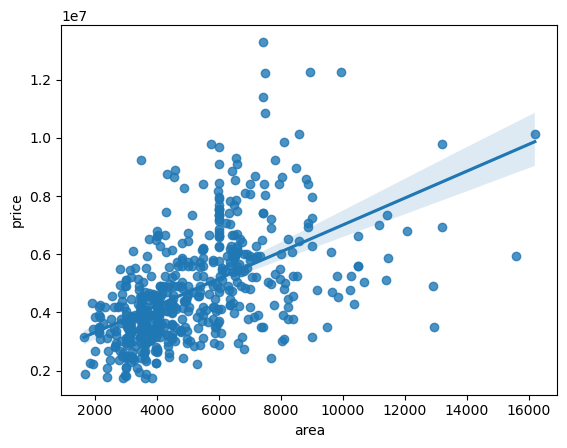

In [8]:
#bivariate
sns.regplot(x="area",y="price",data=df) #

<Axes: xlabel='area', ylabel='price'>

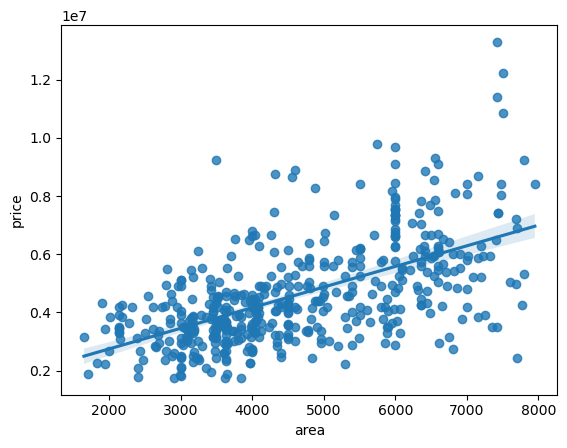

In [13]:
# percentiles removal of outliers 
df["area"].quantile([0.5,0.95,0.99])  #gives the percentlies at each point
df1=df.loc[df["area"]<df["area"].quantile(0.90),:]
sns.regplot(x="area",y="price",data=df1)

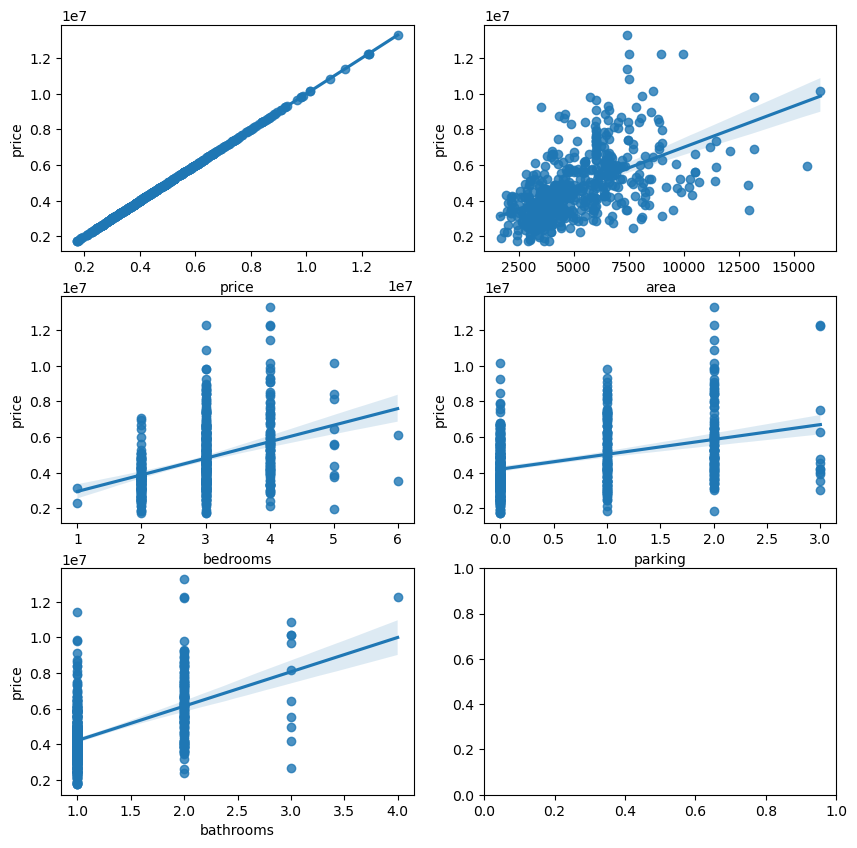

In [32]:
#subplots
df.columns
col=["price","area","bedrooms","parking","bathrooms"]
fig, axs=plt.subplots(nrows=3,ncols=2,figsize=(10,10))
for i in range(0,len(col)):
    row=i//2
    coln=i%2
    ax=axs[row,coln]
    plot=sns.regplot(x = col[i],y="price",data=df,ax=ax)
    

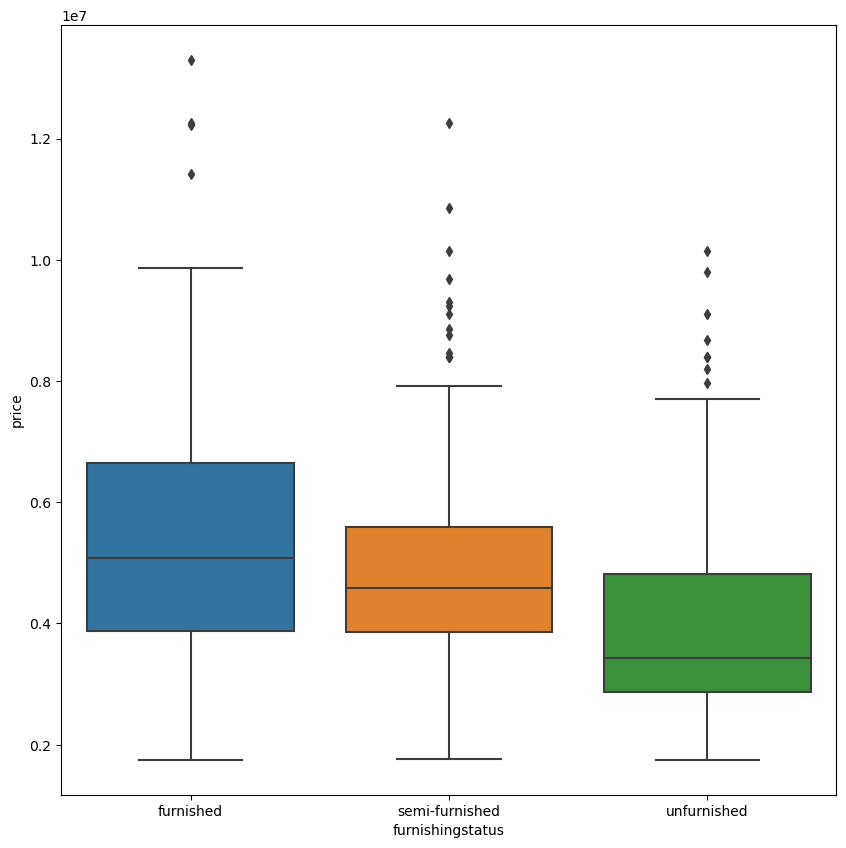

In [35]:
#box plots for different data types
fig, axs = plt.subplots(figsize=(10,10))

plot=sns.boxplot(x="furnishingstatus",y="price",data=df,ax=axs)

In [3]:
import datetime
import calendar

# Example datetime object representing a date before 1970
dt = datetime.datetime(1965,1,2, 13,44,18)
print(dt)

# Convert datetime object to a UTC time tuple
utc_time_tuple = dt.utctimetuple()

# Convert UTC time tuple to Unix timestamp
unix_time = calendar.timegm(utc_time_tuple)

print("Unix time:", unix_time)


1965-01-02 13:44:18
Unix time: -157630542
